In [ ]:
%load_ext autoreload
%matplotlib inline

In [1]:
###### %autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import sys,os,glob
import pprint
import re
import xarray as xr

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])

## Load own libraries
from setEnv import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['thermoConstants', 'setEnv', 'thermoFunctions', 'importingData', 'statisticalDistributions', 'plot1DInvLog', 'conditionalstats', 'dataFormat', 'savingResults', 'thermoConstantsForMoistAdiabat', 'scalingApproximations', 'slicingAndSubsetting', 'thermoFunctionsForMoistAdiabat', 'plot2D']


In [2]:
case = 'RCE'
simroot = "RCE_MPDATAxTKExCAMxSAM1MOM_4000x4000x15_256x256x64"
sst_ref = 306
state = 'organized'
# state = 'disorganized'
state_label = {'organized':'','disorganized':'-radhomo'}
expname = "TKE-SST%d%s-r1"%(sst_ref,state_label[state])
print("experiment:",expname)
simname = "%s_%s"%(simroot,expname)
archivedir = getArchivedir(machine='coriknl')

experiment: TKE-SST306-r1


In [12]:
simdir = os.path.join(archivedir,simname,'OUT_STAT')
filename = "%s.nc"%simname
ds = xr.open_dataset(os.path.join(simdir,filename))

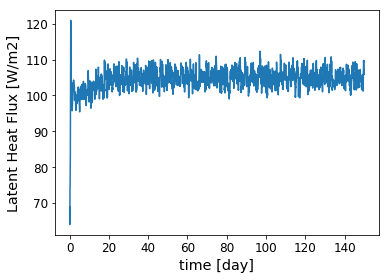

In [13]:
ds.LHF.plot()

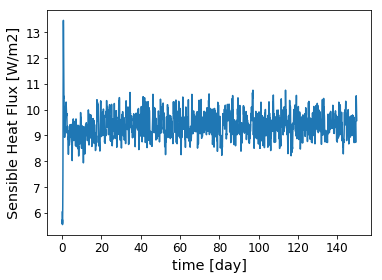

In [14]:
ds.SHF.plot()

In [15]:
ndays = 60
K = 24*ndays
H = ds.SHF.data[-K:].mean()
LE = ds.LHF.data[-K:].mean()
print('H =',H,'W/m2')
print('LE =',LE,'W/m2')

H = 9.41006 W/m2
LE = 104.962 W/m2


In [16]:
header = "day sst(K) H(W/m2) LE(W/m2) TAU(m2/s2)\n"
line1 = " 0. %3.1f %3.3f %3.3f 0.\n"%(sst_ref,H,LE)
line2 = " 1000. %3.1f %3.3f %3.3f 0.\n"%(sst_ref,H,LE)

# Create surface file

In [17]:
modeldir = getModelDir()
sfc_file = os.path.join(modeldir,case,'sfc_from_%s'%expname)

In [18]:
f = open(sfc_file,'w')
f.write(header)
f.write(line1)
f.write(line2)
f.close()